# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [77]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [78]:
def num_nans(df):
    empty_rows = df.isna().any(axis=1)
    num_rows_with_empty_columns = empty_rows.sum()
    return num_rows_with_empty_columns

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [79]:
def drop_na(df):
    na_counts = df.isna().sum(axis=0)
    df_cleaned = df.drop(na_counts[na_counts > 200].index, axis=1)
    return df_cleaned

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [80]:
def to_numerical(df):
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)
    return df['Sex']    

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [81]:
def extract_names(df):
    first_names = []
    middle_names = []
    last_names = []
    titles = []

    for name in df['Name']:
        name_parts = name.split(', ')
        if len(name_parts) == 2:
            last_name, rest = name_parts
            if '.' in rest:
                title, full_name = rest.split('. ', 1)
            else:
                title, full_name = None, rest
            
            full_name = full_name.split(' (')[0].strip()
            
            name_tokens = full_name.split(' ')
            if len(name_tokens) == 1:
                first_name = name_tokens[0]
                middle_name = None
            elif len(name_tokens) == 2:
                first_name, middle_name = name_tokens
            else:
                first_name = name_tokens[0]
                middle_name = ' '.join(name_tokens[1:])
        else:
            last_name, title, first_name, middle_name = None, None, None, None

        last_names.append(last_name)
        titles.append(title)
        first_names.append(first_name)
        middle_names.append(middle_name)

    extracted_names = pd.DataFrame({
        'First Name': first_names,
        'Middle Name': middle_names,
        'Last Name': last_names,
        'Title': titles
    })

    return extracted_names

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [82]:
def replace_with_mean(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

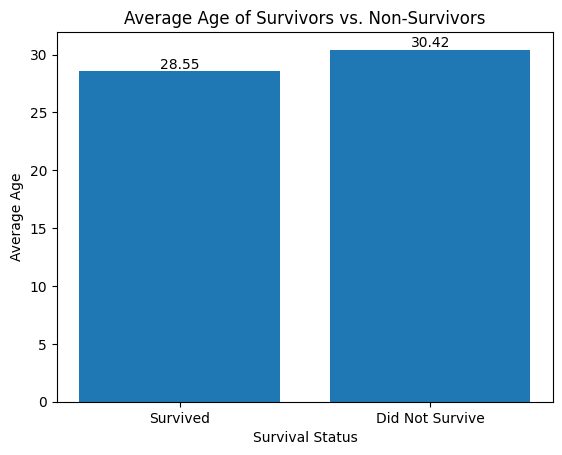

In [83]:
import matplotlib.pyplot as plt

survived_age = df[df['Survived'] == 1]['Age'].mean()
not_survived_age = df[df['Survived'] == 0]['Age'].mean()

bars = plt.bar(['Survived', 'Did Not Survive'], [survived_age, not_survived_age])

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.xlabel('Survival Status')
plt.ylabel('Average Age')
plt.title('Average Age of Survivors vs. Non-Survivors')

plt.show()

The graph shows that the avg of survivors was less than that of the non-survivors.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

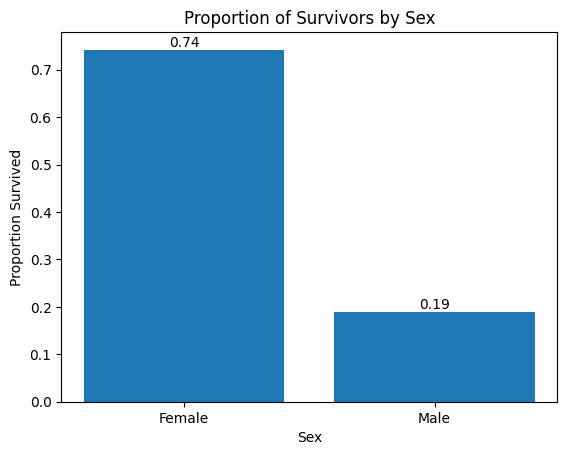

In [84]:
sex_counts = df.groupby('Sex')['Sex'].count()
total_males = sex_counts[0]
total_females = sex_counts[1]

females_survived = df[(df['Sex'] == 1) & (df['Survived'] == 1)]['Survived'].count()
males_survived = df[(df['Sex'] == 0) & (df['Survived'] == 1)]['Survived'].count()

bars = plt.bar(['Female', 'Male'], [females_survived/total_females, males_survived/total_males])

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Proportion Survived')
plt.title('Proportion of Survivors by Sex')

plt.show()

proportion of female survivors was way higher than proportion of male survivors.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

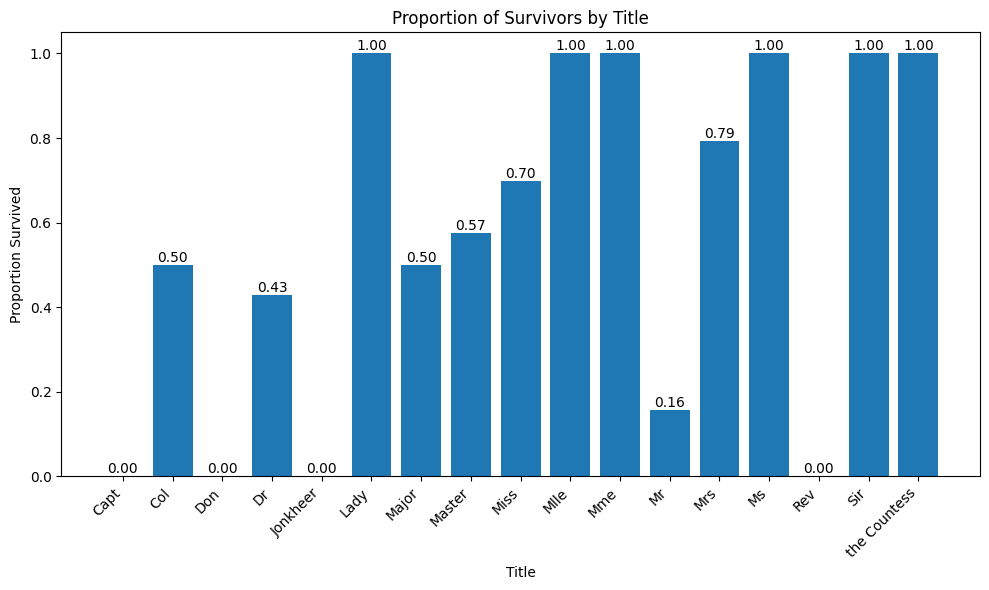

In [85]:
title_counts = df['Title'].value_counts()
survivor_counts = df.groupby('Title')['Survived'].sum()
title_proportions = survivor_counts/title_counts

plt.figure(figsize=(10, 6))
bars = plt.bar(title_proportions.index, title_proportions)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.xlabel('Title')
plt.ylabel('Proportion Survived')
plt.title('Proportion of Survivors by Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

seeminly the people of higher class had a higher survival rate than that of the lower class

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

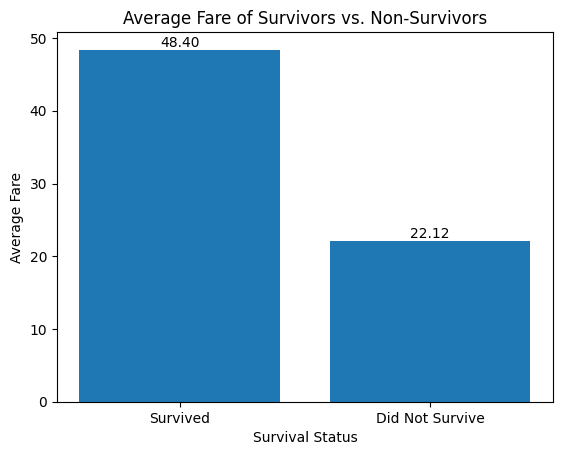

In [86]:
survived_fare = df[df['Survived'] == 1]['Fare'].mean()
not_survived_fare = df[df['Survived'] == 0]['Fare'].mean()

bars = plt.bar(['Survived', 'Did Not Survive'], [survived_fare, not_survived_fare])

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.title('Average Fare of Survivors vs. Non-Survivors')

plt.show()

survival rate for people with an expensive tickets were higher than that of people with cheaper tickets. 

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

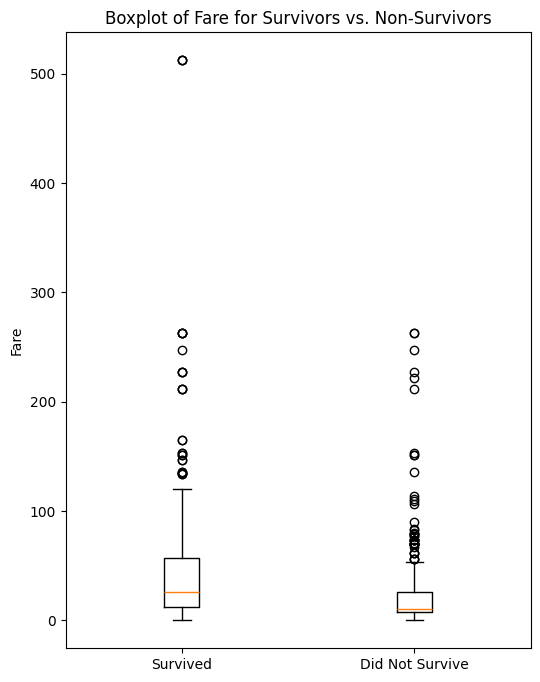

In [87]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

plt.figure(figsize=(6, 8))
plt.boxplot([fare_survived, fare_not_survived], labels=['Survived', 'Did Not Survive'])
plt.ylabel('Fare')
plt.title('Boxplot of Fare for Survivors vs. Non-Survivors')

plt.show()

According to my boxplot, the interquartile range of the fares of the people who survived was higher than that for people who did not survive. Moreover, the fares for the people who did not survive had significantly more outliers.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [88]:
def standardize_fare(df):
    mean_fare = df['Fare'].mean()
    std_fare = df['Fare'].std()
    df['Fare'] = (df['Fare'] - mean_fare) / std_fare
    return(df['Fare'])

df['Fare'] = standardize_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [89]:
df['Title'] = df['Title'].fillna('')
df['First Name'] = df['First Name'].fillna('')
df['Middle Name'] = df['Middle Name'].fillna('')
df['Last Name'] = df['Last Name'].fillna('')

df['Full Name'] = df.apply(lambda row: row['Title'] + ' ' if row['Title'] != '' else '', axis=1)
df['Full Name'] += df.apply(lambda row: row['First Name'] + ' ' if row['First Name'] != '' else '', axis=1)
df['Full Name'] += df.apply(lambda row: row['Middle Name'] + ' ' if row['Middle Name'] != '' else '', axis=1)
df['Full Name'] += df.apply(lambda row: row['Last Name'], axis=1)

new_df = df[['Full Name']]

# The code above is to preserve the names for the next part

df = df.select_dtypes(include=['number'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [90]:
def euclidean_distance(row1, row2):
    return sum((x - y) ** 2 for x, y in zip(row1, row2)) ** 0.5

def N_most_similar_pairs(df, N):
    distances = []
    
    for idx1, row1 in df.iterrows():
            for idx2, row2 in df.iterrows():
                if idx1 < idx2:
                    dist = euclidean_distance(row1, row2)                    
                    if dist > 0:
                        distances.append(((new_df.iloc[idx1, 0], new_df.iloc[idx2, 0]), dist))
        
    sorted_distances = sorted(distances, key=lambda x: x[1])
    most_similar_pairs = sorted_distances[:N]
    
    similar_pairs_names = [pair[0] for pair in most_similar_pairs]
    
    return similar_pairs_names

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [('Miss Mary McGovern', 'Miss Helen Mary "Ellie" Mockler'), ('Mr William John Berriman', 'Mr Moses Aaron Troupiansky'), ('Mr Kanio Ivanoff', 'Mr Minko Nankoff')]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

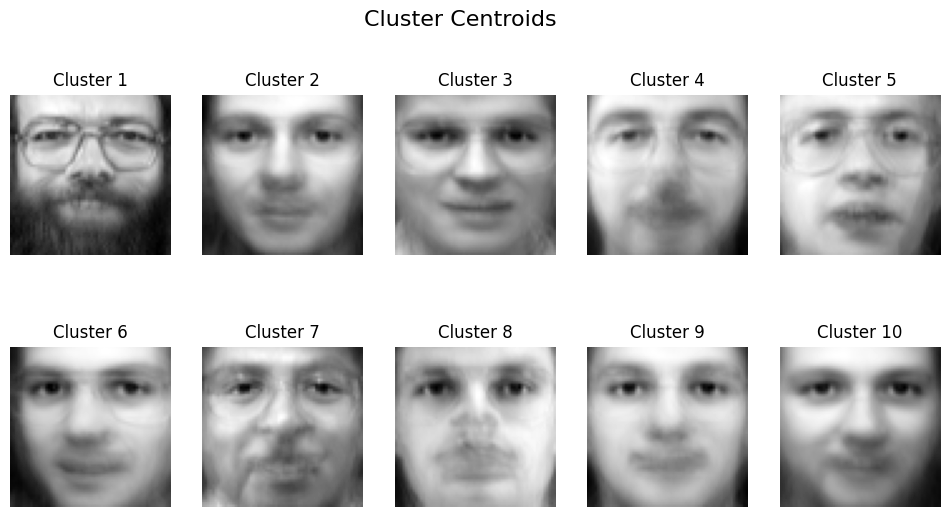

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(faces_data)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i].reshape(faces.images.shape[1:]), cmap=plt.cm.gray)
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')

plt.suptitle('Cluster Centroids', fontsize=16)
plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [92]:
from sklearn.metrics import silhouette_score

true_labels = faces.target
kmeans_labels = kmeans.labels_

silhouette_kmeans = silhouette_score(faces_data, kmeans_labels)
silhouette_true_labels = silhouette_score(faces_data, true_labels)

print(f"Silhouette Score for K-means Clustering: {silhouette_kmeans}")
print(f"Silhouette Score for Clustering Based on True Labels: {silhouette_true_labels}")

Silhouette Score for K-means Clustering: 0.09155301004648209
Silhouette Score for Clustering Based on True Labels: 0.1055736318230629


Both clustering approaches have relatively low silhouette scores, indicating that neither method results in very well-separated clusters. This could be due to the inherent complexity and overlap in the facial images dataset. However, the clustering based on true labels performs slightly better, suggesting that the natural grouping of images by the true identity labels captures some underlying structure in the data that K-means may not fully capture.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

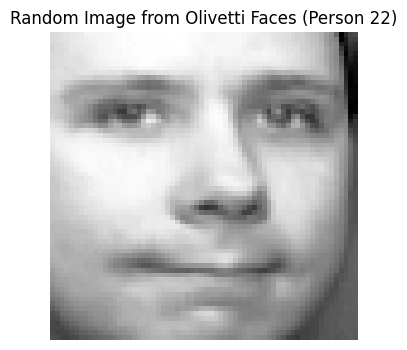

In [93]:
images = faces.images
n_samples = faces_data.shape[0]
random_index = np.random.randint(0, n_samples)
random_image = images[random_index]

plt.figure(figsize=(4, 4))
plt.imshow(random_image, cmap=plt.cm.gray)
plt.title(f"Random Image from Olivetti Faces (Person {faces.target[random_index]})")
plt.axis('off')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

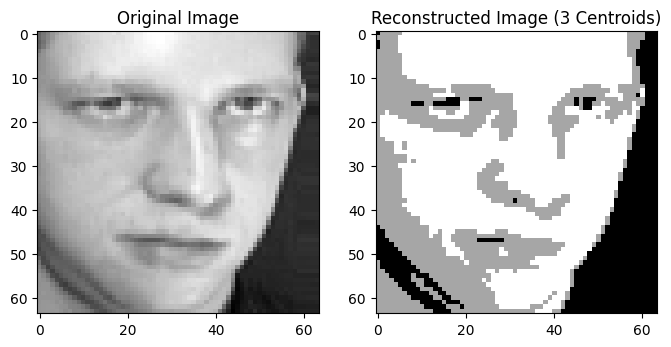

In [94]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

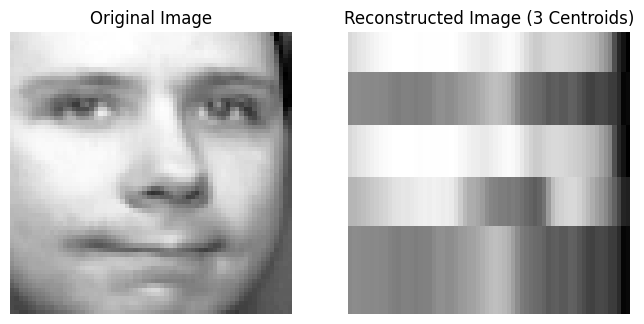

In [95]:
image_2d = random_image.reshape((-1, random_image.shape[1]))
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(image_2d)
centroids = kmeans.cluster_centers_
image_reconstructed = centroids[kmeans.labels_].reshape(random_image.shape)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_image, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap=plt.cm.gray)
plt.title("Reconstructed Image (3 Centroids)")
plt.axis('off')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

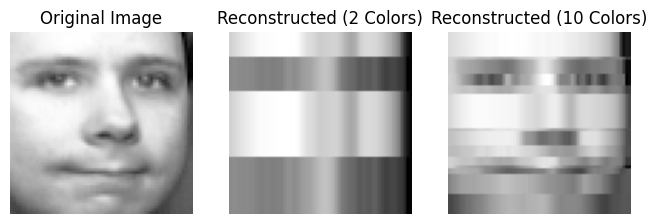

In [96]:
def reconstruct_image_with_colors(image, num_colors):
    image_2d = image.reshape((-1, image.shape[1]))
    kmeans = KMeans(n_clusters=num_colors, n_init=10, random_state=42)
    kmeans.fit(image_2d)
    centroids = kmeans.cluster_centers_
    image_reconstructed = centroids[kmeans.labels_].reshape(image.shape)
    return image_reconstructed

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(random_image, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

reconstructed_image_2_colors = reconstruct_image_with_colors(random_image, num_colors=2)
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image_2_colors, cmap=plt.cm.gray)
plt.title("Reconstructed (2 Colors)")
plt.axis('off')

reconstructed_image_10_colors = reconstruct_image_with_colors(random_image, num_colors=10)
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image_10_colors, cmap=plt.cm.gray)
plt.title("Reconstructed (10 Colors)")
plt.axis('off')

plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

In [97]:
import numpy as np

# Define the centers
centers = np.array([[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]])

variance = 1
num_points = 10
data = []

# Generate data points around each center
for center in centers:
    cluster_data = center + np.random.randn(num_points, 3) * variance
    data.extend(cluster_data)

data = np.array(data)

np.random.shuffle(data)

print(data[:10])


[[-3.67726363 -0.43150578 -1.1762652 ]
 [-0.45453521 -0.36966889 -0.15195204]
 [ 1.78032332  2.52333266  2.9902595 ]
 [-0.26238209  0.20381482 -0.4626131 ]
 [-4.62874002  0.29510491 -0.57035579]
 [-5.77706329 -5.08568495  0.98136015]
 [-1.11792743  0.14445518  0.52598852]
 [-2.29634664 -1.07434267 -1.53475878]
 [ 0.55219812 -0.05705002  1.21039228]
 [ 2.68673747 -0.47830196 -1.25466391]]


In [98]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class KMeans3D():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        TEMPFILE = "temp.png"

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.assignment, cmap = 'Accent')
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=100)

        ax.view_init(elev=10, azim=30)  # Set the view angle
        
        ax.set_xlim([-5, 5])  # Set appropriate x limits
        ax.set_ylim([-5, 5])  # Set appropriate y limits
        ax.set_zlim([-5, 5])  # Set appropriate z limits

        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)),self.k, replace = False)]
    
    def distance(self, x, y):
        return np.linalg.norm(x - y)
    
    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'), 0]
            for j in range(len(centers)):
                distance = self.distance(centers[j], self.data[i])
                if distance < delta[0]:
                    delta[0] = distance 
                    delta[1] = j 
            
            self.assignment[i] = delta[1]

    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x = 0
            y = 0
            z = 0
            for delta in range(len(cluster)):
                x += cluster[delta][0]
                y += cluster[delta][1]
                z += cluster[delta][2]
            centers.append([x/len(cluster), y/len(cluster), z/len(cluster)])
        
        return np.array(centers)

    def is_diff_centers(self, centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if any(centers[i] != new_centers[i]):
                flag = 1
        
        return flag == 1

    def lloyds(self):
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers, new_centers):
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

# Create a KMeans3D object with your data and k value
kmeans_3d = KMeans3D(data, 4)

# Run the clustering algorithm
kmeans_3d.lloyds()

# Save the snapshots as a GIF
kmeans_3d.snaps[0].save(
    'kmeans_3d.gif',
    optimize=False,
    save_all=True,
    append_images=kmeans_3d.snaps[1:],
    loop=0,
    duration=500
)


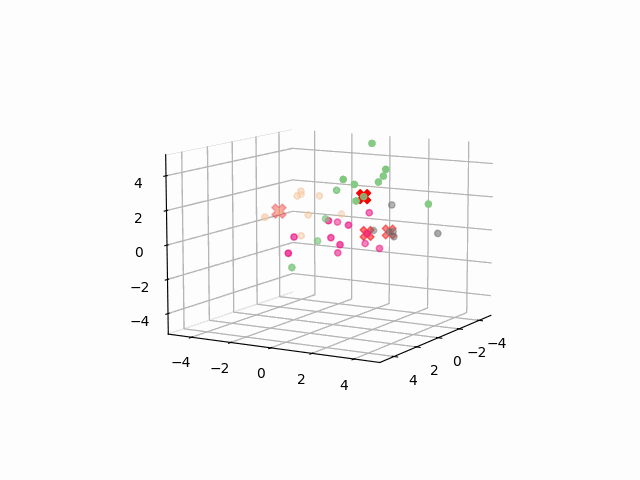

In [99]:
from IPython.display import Image

Image(filename='kmeans_3d.gif')
